# 109 In-Class Assignment: Least Squares Fit (LSF)

<img alt="image showing a 3D vector projected onto a 2D plane" src="https://lh5.googleusercontent.com/RFgtgkULxOPzUC8lwl1j265FjpzaD2YIDHjy94VyqOOU7xIQf03bsHDSmxYNOmYDXeLPn7iMTg=w740" width="50%">
</p>


### Agenda for today's class

1. [SIRS Link](#sirs)
1. [Finding the best solution in an overdetermined system](#Finding_the_best_solution_in_an_overdetermined_system)
1. [Pseudoinverse](#Pseudoinverse)
1. [LSF Example: Tracking the Planets](#LSF-Example:-Tracking-the-Planets)
2. [LSF Example: Predator Pray Model](#LSF-Example:-Predator-Pray-Model)
3. [LSF Example: Estimating the best Ellipses](#LSF-Example:-Estimating-the-best-Ellipses)



---
<a name="sirs"></a>

# 1. SIRS

* [SIRS](https://sirsonline.msu.edu)

----
<a name="Finding_the_best_solution_in_an_overdetermined_system"></a>
# 2. Finding the best solution in an overdetermined system

Let $Ax = y$ be a system of $m$ linear equations in $n$ variables. A *least squares solution* of $Ax = y$ is an solution $\hat{x}$ in $R^n$ such that:

$$ \min_{\hat{x}}\|y - A\hat{x}\|.$$

Note we substitute $y$ for our typical variable $b$ here because we will use $b$ later to represent the intercept to a line and we want to try and avoid confusion in notation. It also consistent with the picture above. 

In other words, $\hat{x}$ is a value of $x$ for which $Ax$ is as close as possible to $y$. From previous lectures, we know this to be true if the vector $$y - A\hat{x}$$ is orthogonal (perpendicular) to the column space of $A$.

We also know that the dot product is zero if two vectors are orthogonal. So we have  
$$a \cdot (Ax - y)  = 0, $$
for all vectors $a$ in the column spaces of $A$.

The columns of $A$ span the column space of $A$. Denote the columns of $A$ as 
$$A = [a_1, \cdots, a_n].$$ 
Then we have 
$$a_1^\top (Ax - y)  = 0, \\ a_2^\top(Ax-y)=0\\\vdots \\a_n^\top(Ax-y)=0.$$
It is the same as taking the transpose of $A$ and doing a matrix multiply:
$$A^\top (Ax - y) = 0.$$

That is:

<font size=40>$$A^\top Ax = A^\top y$$</font>

The above equation is called the *least squares solution* to the original equation $Ax=y$.  The matrix $A^\top A$ is symmetric and invertable. Then solving for $\hat{x}$ can be calculated as follows:

$$x = (A^\top A)^{-1}A^\top y$$


The matrix $(A^\top A)^{-1}A^\top$ is also called the left inverse.

**Example:** A researcher has conducted experiments of a particular Hormone dosage in a population of rats. The table shows the number of fatalities at each dosage level tested. Determine the least squares line and use it to predict the number of rat fatalities at hormone dosage of 22. 

| Hormone level  | 20 | 25 | 30 | 35 | 40 | 45 | 50  |
|---|---|---|---|---|---|---|---|
| Fatalities | 101 | 115 | 92 | 64 | 60 | 50 | 49| 


In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import sympy as sym
import time
sym.init_printing(use_unicode=True)

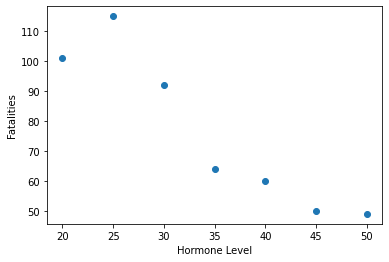

In [2]:
H = [20,25,30,35,40,45,50]
f = [101,115, 92,64,60,50,49]

plt.scatter(H,f)
plt.xlabel('Hormone Level')
plt.ylabel('Fatalities')
f = np.matrix(f).T

We want to determine a line that is expressed by the following equation 

$$f = aH + b,$$

to approximate the connection between Hormone dosage ($H$) and Fatalities $f$. 
That is, we want to find $a$ (slope) and $b$ (y-intercept) for this line. First we define the variable $ 
x = \left[
\begin{matrix}
    a  \\
    b  
\end{matrix}
\right] 
$ as the column vector that needs to be solved.

&#9989;**<font color=red>DO THIS:</font>** Rewrite the system of equations to the form $Ax=y$ by defining your ```numpy``` matrices ```A``` and ```y``` using the data from above:

In [3]:
#put your code here

&#9989; **<font color=red>QUESTION:</font>** Calculate the square matrix $C = A^\top A$ and the modified right hand side vector as $A^\top y$ (Call it ```Aty```):

In [4]:
#put your code here

&#9989;**<font color=red>QUESTION:</font>** Find the *least squares solution* by solving $Cx=A^\top y$ for $x$.

In [5]:
# Put your code here

&#9989;**<font color=red>QUESTION:</font>** Given the solution above, define the two scalars slope ```a``` and y-intercept ```b```.

In [6]:
#put your code here

The following code will Plot the original data and the line estimated by the coefficients found in the above quation.

NameError: name 'a' is not defined

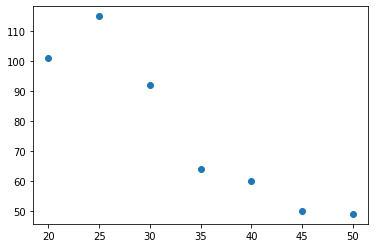

In [7]:
H = [20,25,30,35,40,45,50]
f = [101,115, 92,64,60,50,49]
plt.scatter(H,f)

H2 = np.linspace(np.min(H), np.max(H))

f2 = a * H2 + b

plt.plot(H2, f2)


&#9989;**<font color=red>QUESTION:</font>**  Repeat the above analysis but now with a eight-order polynomial.

&#9989;**<font color=red>QUESTION:</font>**  Play with the interactive function below by adjusting the degree of the least-squares fit approximation. Then extend the `x_min` and `x_max` parameters. Do you think that an eight-order polynomial is a good model for this dataset? Why or why not?

In [ ]:
from ipywidgets import interact, fixed
import ipywidgets as widgets

@interact(x=fixed(H), y=fixed(f), degree=widgets.IntSlider(min=1, max=8, step=1, value=8), x_min=widgets.IntSlider(min=min(H)-10, max=min(H), step=1, value=min(H)), x_max=widgets.IntSlider(min=max(H), max=max(H)+10, step=1, value=max(H)))
def graphPolyN(x, y, x_min, x_max, degree):
    p = np.polyfit(x, y, degree)
    f = np.poly1d(p)
    
    x_pred = np.linspace(x_min, x_max, 1000)
    y_pred = f(x_pred)
    
    plt.scatter(x, y, color="red")
    plt.plot(x_pred, y_pred)
    

Put your answer to the above question here

&#9989;**<font color=red>QUESTION:</font>**  Check the rank of $C=A^\top A$ for the previous case. What do you get? Why?

Put your answer to the above question here

----
<a name="Pseudoinverse"></a>
# 3. Pseudoinverse

In this class we often talk about solving problems of the form:

$$Ax = b$$

Currently we have determined that this problem becomes very nice when the $n \times n$ matrix $A$ has an inverse. We can easily multiply each side by the inverse:

$$A^{-1}Ax = A^{-1}b$$

Since $A^{-1}A = I$ the solution for $x$ is simply:

$$x = A^{-1}b$$

Now, let us consider a a more general problem where the $m \times n$ matrix $A$ is not square, i.e. $m \neq n$ and its rank $r$ maybe less than $m$ and/or $n$.  In this case we want to find a Pseudoinverse (which we denote as $A^+$) which acts like an inverse for a non-square matrix. In other words we want to find an $A^+$ for $A$ such that:

$$A^+A \approx I$$

Assuming we can find the $n \times m$ matrix $A^+$, we should then be able to solve for $x$ as follows:

$$Ax = b$$
$$A^+Ax = A^+b$$
$$x \approx A^+b$$

## How do we know there is a Psudoinverse
Assuming the general case of a $m\times n$ matrix $A$ where its rank $r$ maybe less than $m$ and/or $n$ ($r\leq m$ and $r\leq n$). We can conclude the following about the fundamental spaces of $A$:
- The rowspace of $A$ is in $R^n$ with dimension $r$ 
- The columnspace of $A$ is in $R^m$ also with dimension $r$.
- The nullspace of $A$ is in $R^n$ with dimension $n-r$
- The nullspace of $A^T$ is in $R^m$ with dimension $m-r$.

Because the rowspace of $A$ and the column space $A$ have the same dimension then $A$ is a the one-to-one mapping from the row space to the columnspace. In other words:
- For any $x$ in the rowspace, we have that $Ax$ is one point in the columnspace. If $x'$ is another point in the row space different from $x$, we have $Ax\neq Ax'$ (The mapping is one-to-one). 
- For any $y$ in the columnspace, we can find $x$ in the rowspace such that $Ax=y$ (The mapping is onto). 

The above is not really a proof but hopefully there is sufficient information to convince yourself that this is true. 

**Example 1:** Let $$A=[1,2]$$
we know that 
$r=m=1$ and $n=2$.

In [ ]:
A = np.matrix([[1,2]])

&#9989;**<font color=red>TODO:</font>**  Calculate the pseudoinverse $A^+$ of $A$ using the ```numpy.linalg``` function ```pinv```:

In [ ]:
#put your code here

&#9989;**<font color=red>DO THIS:</font>**  Compute $AA^+$ and $A^+A$

In [ ]:
#put your code here

&#9989;**<font color=red>QUESTION:</font>** If $x$ is in the nullspace of $A$ what is the effect of $A^+Ax$?

Put your answer to the above question here

&#9989;**<font color=red>QUESTION:</font>**  If $x$ is in the rowspace of $A$ what is the effect of $A^+Ax$?

Put your answer to the above question here

**Example 2:** Let $$A=\begin{bmatrix}1\\2\end{bmatrix}$$
we know that 
$r=n=1$ and $m=2$. Then we have the left inverse.

In [ ]:
A = np.matrix([[1],[2]])
A

&#9989;**<font color=red>DO THIS:</font>** Calculate the pseudoinverse $A^+$ of $A$.

Put your answer to the above question here


&#9989;**<font color=red>DO THIS:</font>**  Calculate the left inverse of $A$, and verify that it is the same as $A^+$.

Put your answer to the above question here



---
<a name=LSF-Example:-Tracking-the-Planets></a>
## 4. LSF Example: Tracking the Planets




<img alt="composit image of the planets (and sun) in our solar system" src="https://images.squarespace-cdn.com/content/v1/537a20bce4b0c4a5e913ae77/1533010529325-0H1VQX4W19MAJCRGSTQF/ke17ZwdGBToddI8pDm48kJokDDWUnHQ7jYDwh9g9o2tZw-zPPgdn4jUwVcJE1ZvWQUxwkmyExglNqGp0IvTJZUJFbgE-7XRK3dMEBRBhUpy5LokhjEjEjl7mG0bnsgbfHG96R3ZWfXdsfqmd9qx-1I79M1PjxisoyjE5_sBXuWQ/solar-system-439046_640.jpg?format=1500w" width="100%">
  
The following table lists the average distance from the sun to each of the first seven planets, using Earth's distance as a unit of measure (AUs). 

| Mercury | Venus | Earth | Mars | Jupiter | Satern | Uranus | 
|---------|-------|-------|------|---------|--------|--------|
| 0.39    | 0.72  | 1.00  | 1.52 | 5.20    | 9.54   | 19.2   |

The following is a plot of the data:

In [ ]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import sympy as sym
import math
sym.init_printing()

In [ ]:
distances = [0.39, 0.72, 1.00, 1.52, 5.20, 9.54, 19.2]
planets = ['Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'Satern','Uranus']
ind = [1.0,2.0,3.0,4.0,5.0,6.0,7.0]

plt.scatter(ind, distances);
plt.xticks(ind,planets)
plt.ylabel('Distance (AU)')

**Note** that the above plot does not look like a line, and so finding the line of best fit is not fruitful.  It does, however look like an exponential curve (maybe a polynomial?). The following step transforms the distances using the numpy **```log```** function and generates a plot that looks much more linear. 

In [ ]:
log_distances = np.log(distances)

plt.scatter(ind,log_distances)
plt.xticks(ind,planets)
plt.ylabel('Distance (log(AU))')

For this question we are going to find the coefficients ($c$) for the best fit line of the form $c_1 + c_2i= \log{d}$, where $i$ is the index of the planet and $d$ is the distance.  

The following code constructs this problem in the form $Ax=b$ and define the $A$ matrix and the $b$ matrix as numpy matrices

In [ ]:
A = np.matrix(np.vstack((np.ones(len(ind)),ind))).T
b = np.matrix(log_distances).T
sym.Matrix(A)

In [ ]:
sym.Matrix(b)

&#9989; **<font color=red>DO THIS:</font>** Solve for the best fit of $Ax=b$ and define a new variable $c$ which consists of the of the two coefficients used to define the line $(\log{d} = c_1 + c_2i)$

In [ ]:
##Put your answer here:

&#9989; **<font color=red>DO THIS:</font>** Modify the following code (as needed) to plot your best estimates of $c_1$ and $c_2$ against the provided data.  

In [ ]:
## Modify the following code

est_log_distances = (c[0] + c[1]*np.matrix(ind)).tolist()[0]
plt.plot(ind,est_log_distances)

plt.scatter(ind,log_distances)
plt.xticks(ind,planets)
plt.ylabel('Distance (log(AU))')

We can determine the quality of this line fit by calculating the root mean squared error between the estimate and the actual data:

In [ ]:
rmse = np.sqrt(((np.array(log_distances)  - np.array(est_log_distances)) ** 2).mean())
rmse

Finally, we can also make the plot on the original axis using the inverse of the log (i.e. the exp function):

In [ ]:
est_distances = np.exp(est_log_distances)
plt.scatter(ind,distances)
plt.plot(ind,est_distances)
plt.xticks(ind,planets)
plt.ylabel('Distance (AU)')

The asteroid belt between Mars and Jupiter is what is left of a planet that broke apart.  Let's the above calculation again but renumber so that  the index of Jupyter is 6, Saturn is 7 and Uranus is 8 as follows:

In [ ]:
distances = [0.39, 0.72, 1.00, 1.52, 5.20, 9.54, 19.2]
planets = ['Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'Satern','Uranus']
ind = [1,2,3,4,6,7,8]

log_distances = np.log(distances)

&#9989; **<font color=red>DO THIS:</font>** Repeat the calculations from above with the updated model.  Plot the results and compare the RMSE.

In [ ]:
## Copy and Paste code from above

In [ ]:
## Copy and Paste code from above
est_log_distances = (c[0] + c[1]*np.matrix(ind)).tolist()[0]

est_distances = np.exp(est_log_distances)
plt.scatter(ind,distances)
plt.plot(ind,est_distances)
plt.xticks(ind,planets)
plt.ylabel('Distance (AU)')

rmse = np.sqrt(((np.array(log_distances)  - np.array(est_log_distances)) ** 2).mean())
rmse
## Copy and Paste code from above

This model of planet location was used to help discover Neptune and prompted people to look for the "missing planet" in position 5 which resulted in the discovery of the asteroid belt.  Based on the above model, what is the estimated  distance of the asteroid belt and Neptune (index 9) from the sun in AUs? (**Hint:** you can check your answer by searching for the answer on-line).

In [ ]:
#Put your prediction calcluation here


---
<a name=LSF-Example:-Predator-Pray-Model></a>
## 5. LSF Example: Predator Pray Model



<img alt="Cartoon image of a cat chasing a wind up mouse" src="https://cdn.pixabay.com/photo/2016/06/14/15/46/cat-1456878_1280.png" width=30%>

The following example example data comes from https://mathematica.stackexchange.com/questions/34761/find-parameters-of-odes-to-fit-solution-data and represents some experimental data ```time```, ```x``` and ```y```.

$$dx = ax - bxy$$
$$dy = -cy + dxy$$

The following code plots the data

In [ ]:
# (* The first column is time 't', the second column is coordinate 'x', and the last column is coordinate 'y'. *)
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np

data=[[11,45.79,41.4],
      [12,53.03,38.9],[13,64.05,36.78],
      [14,75.4,36.04],[15,90.36,33.78],
      [16,107.14,35.4],[17,127.79,34.68],
      [18,150.77,36.61], [19,179.65,37.71],
      [20,211.82,41.98],[21,249.91,45.72],
      [22,291.31,53.1],[23,334.95,65.44],
      [24,380.67,83.],[25,420.28,108.74],
      [26,445.56,150.01],[27,447.63,205.61],
      [28,414.04,281.6],[29,347.04,364.56],
      [30,265.33,440.3],[31,187.57,489.68],
      [32,128.,512.95],[33,85.25,510.01],
      [34,57.17,491.06],[35,39.96,462.22],
      [36,29.22,430.15],[37,22.3,396.95],
      [38,16.52,364.87],[39,14.41,333.16],
      [40,11.58,304.97],[41,10.41,277.73],
      [42,10.17,253.16],[43,7.86,229.66],
      [44,9.23,209.53],[45,8.22,190.07],
      [46,8.76,173.58],[47,7.9,156.4],
      [48,8.38,143.05],[49,9.53,130.75],
      [50,9.33,117.49],[51,9.72,108.16],
      [52,10.55,98.08],[53,13.05,88.91],
      [54,13.58,82.28],[55,16.31,75.42],
      [56,17.75,69.58],[57,20.11,62.58],
      [58,23.98,59.22],[59,28.51,54.91],
      [60,31.61,49.79],[61,37.13,45.94],
      [62,45.06,43.41],[63,53.4,41.3],
      [64,62.39,40.28],[65,72.89,37.71],
      [66,86.92,36.58],[67,103.32,36.98],
      [68,121.7,36.65],[69,144.86,37.87],
      [70,171.92,39.63],[71,202.51,42.97],
      [72,237.69,46.95],[73,276.77,54.93],
      [74,319.76,64.61],[75,362.05,81.28],
      [76,400.11,105.5],[77,427.79,143.03],
      [78,434.56,192.45],[79,410.31,260.84],
      [80,354.18,339.39],[81,278.49,413.79],
      [82,203.72,466.94],[83,141.06,494.72],
      [84,95.08,499.37],[85,66.76,484.58],
      [86,45.41,460.63],[87,33.13,429.79],
      [88,25.89,398.77],[89,20.51,366.49],
      [90,17.11,336.56],[91,12.69,306.39],
      [92,11.76,279.53],[93,11.22,254.95],
      [94,10.29,233.5],[95,8.82,212.74],
      [96,9.51,193.61],[97,8.69,175.01],
      [98,9.53,160.59],[99,8.68,146.12],[100,10.82,131.85]]
data = np.array(data)
t = data[:,0]
x = data[:,1]
y = data[:,2]
plt.scatter(t,x)
plt.scatter(t,y)
plt.legend(('prey', 'preditor'))
plt.xlabel('Time')
plt.title('Population');

&#9989; **<font color=red>QUESTION</font>** What is the formula for numerical differentiation?

**Hint.** Think slope.


&#9989; **<font color=red>DO THIS</font>** Use Numerical Differentiation to calculate $dx$ and $dy$ from $x$ and $y$. See if you can plot $x,dx$ nad $y,dy$ on a couple of plots. Use the plots to try and check to make sure your results make senes.  

In [ ]:
# Put your answer here

&#9989; **<font color=red>DO THIS</font>**  Formulate two linear systems ($Ax=b$) and solve them using LSF as we did in the pre-class. Use one to solve the first ODE and the second to solve the second ODE.  Remember, we are trying to estimate values for $a,b,c,d$ 

In [ ]:
#Put your answer here.

Assuming everything worked the following should plot the result.

In [ ]:
from scipy.integrate import odeint
# The above ODE model sutiable for ODEINT
def deriv(position,t,a,b,c,d):
    x = position[0]
    y = position[1]
    dx = a*x - b*x*y
    dy = -c*y + d*x*y
    return (dx,dy)

# Integrate equations over the time grid, t.
ret = odeint(deriv, (data[0,1],data[0,2]), t, args=(a,b,c,d))

#Plot the model on the data
plt.plot(t,ret)
plt.scatter(t, data[:,1])
plt.scatter(t, data[:,2]);
plt.legend(('x est', 'y est', 'x', 'y'))
plt.xlabel('Time');



---
<a name=LSF-Example:-Estimating-the-best-Ellipses></a>
## 6. LSF Example: Estimating the best Ellipses

   
<img alt="Animated image of planets revolving around the sun" src="https://thumbs.gfycat.com/WhimsicalUnequaledBuzzard-max-1mb.gif" width="30%">
  

In [ ]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import sympy as sym
sym.init_printing(use_unicode=True)

Now consider the following sets of points. Think of these as observations of planet moving in an elliptical orbit. 

In [ ]:
x=[0, 1.0, 1.1, -1.1, -1.2, 1.3]
y =[2*1.5, 2*1.0, 2*-0.99, 2*-1.02, 2*1.2, 2*0]

plt.scatter(x,y)
plt.axis('equal')

In this problem we want to try to fit an ellipse to the above data.  First lets look at a general equation for an ellipse:
    
    $$ \frac{(u+x)^2}{a^2} + \frac{(v+y)^2}{b^2} = 1 \qquad \qquad \text{    (1)}$$
    
Where $u$ and $v$ are the $x$ and $y$ coordinates for the center of the ellipse and $a$ and $b$ are the lengths of the axes sizes of the ellipse.  A quick search on how to plot an ellipse in python comes up with the following example:

In [ ]:
# Code from: https://stackoverflow.com/questions/10952060/plot-ellipse-with-matplotlib-pyplot-python

u=1.     #x-position of the center
v=0.5    #y-position of the center
a=2.     #radius on the x-axis
b=1.5    #radius on the y-axis

t = np.linspace(0, 2*np.pi, 100)
plt.plot( u+a*np.cos(t) , v+b*np.sin(t) )
plt.grid(color='lightgray',linestyle='--')
plt.show()

Notice this example uses equations of the form:

$$t = [0, \dots, 2\pi]$$
$$x = u+a\cos(t)$$
$$y = v+b\sin(t)$$

Turns out that this form of the equation is easier to plot and the variables $u,v,a,b$ are the same as our original equation. 

Now lets expand the original equation (equation 1 from above) and we get the following:

$$x^2−2ux-u^2+y^2−2vy+v^2=r^2 \qquad \qquad \text{    (2)}$$

&#9989; **<font color=red>QUESTION:</font>** Why can't we convert equation 2 into the form $Ax=b$ and solve using Least Squares Fit? Discuss with your group and be prepared to share your thought with the class.

Put your answer to the above question here.

If we look at our data more closely we can simplify equations 1 and 2 by assuming the the centroid (u,v) is at the origin.  This assumption results in the following equation:

$$ \frac{x^2}{a^2} + \frac{y^2}{b^2} = 1 $$

Notice we can rewrite this into a standard linear set of equations by defining $c_o = \frac{1}{a^2}$ and $c_1 = \frac{1}{b^2}$ and rewriting the equation as follows:


$$ c_0x^2 + c_1y^2 = 1 $$

&#9989; **<font color=red>DO THIS</font>** Given that we know the $x$ and $y$ values of our point observations, equation 4 is now linear and can be solved using Least Squares Fit.  Using the observation points from above construct  ```A``` and ```b``` as numpy matrixes for the overdefined system $Ax=b$

Put your answer to the above question here.

In [ ]:
sym.Matrix(A)

In [ ]:
sym.Matrix(b)

&#9989; **<font color=red>DO THIS:</font>** Solve the above over defined system of linear equations for $c_0$ and $c_1$ using LSF.

In [ ]:
# Put your answer to the above question here

Assuming we have $c$ in the correct format, we can now calculate $a$ and $b$ from the solution for $c_o$ and $c_1$ calculated in the previous step and plot using our plotting code:

In [ ]:
c = 1/np.sqrt(np.abs(c))
b=c[1,0] 
a=c[0,0]
print(a,b)

In [ ]:
u=0     #x-position of the center
v=0     #y-position of the center

t = np.linspace(0, 2*np.pi, 100)
plt.plot(u+a*np.cos(t) , v+b*np.sin(t) )
plt.scatter(x,y)
plt.grid(color='lightgray',linestyle='--')
plt.axis('equal');